In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
df_robot1 = pd.read_csv('Dataset/RobotDataset/Robot1', delimiter=' ', header=None)
df_robot2 = pd.read_csv('Dataset/RobotDataset/Robot2', delimiter=' ', header=None)

train_robot1 = df_robot1.sample(frac=0.8, random_state=200)
train_robot2 = df_robot2.sample(frac=0.8, random_state=200)

validation_robot1 = df_robot1.drop(train_robot1.index)
validation_robot2 = df_robot2.drop(train_robot2.index)


In [3]:
def stats(predicted, actual):
    tp = 0
    tn = 0
    fp = 0
    fn = 0

    for i in range(len(actual)):
        if actual[i] == predicted[i] and actual[i] == 1:
            tp += 1
        elif actual[i] == predicted[i] and actual[i] == 0:
            tn += 1
        elif actual[i] != predicted[i] and actual[i] == 0:
            fp += 1
        else:
            fn += 1
            
    total = (float(tn) + float(tp) + float(fp) + float(fn))
    accuracy = (float(tn) + float(tp))/total
    return accuracy

def euclidean(x, y):
    dist = 0.0
    for i in range(2, 7):
        dist += math.pow(x[i]-y[i], 2)
    return np.sqrt(dist)

def manhattan(x, y):
    dist = 0.0
    for i in range(2, 7):
        dist += abs(x[i]-y[i])
    return dist

def minkowski(x, y):
    p = 1.5
    dist = 0.0
    for i in range(2, 7):
        dist += math.pow(abs(x[i]-y[i]), p)
    return math.pow(dist, (1.0)/p)

def cosine(x, y):
    xi = 0.0
    yi = 0.0
    for i in range(2, 7):
        xi += math.pow(x[i], 2)
        yi += math.pow(y[i], 2)
    dist = 0.0
    for i in range(2, 7):
        dist += (x[i]*y[i])
    return 1-((dist)/(np.sqrt(xi)*np.sqrt(yi)))
    
def knn(m, k, train, validation):
    predicted = []
    
    actual = []
    
    res = []
    
    for vindex, vrow in validation.iterrows():
        del res[:]
        
        for tindex, trow in train.iterrows():
            dist = 0.0
            if m == 'euclidean':
                dist = euclidean(vrow, trow)
            if m == 'manhattan':
                dist = manhattan(vrow, trow)
            if m == 'minkowski':
                dist = minkowski(vrow, trow)
            if m == 'cosine':
                dist = cosine(vrow, trow)
            res.append([dist, trow[1]])
    
        res = sorted(res)
        
        i = 0
        zero_count = 0
        one_count = 0
        
        while i < k:
            if res[i][1] == 0:
                zero_count += 1
            
            if res[i][1] == 1:
                one_count +=1 
            i += 1
            
        if zero_count > one_count:            
            predicted.append(0)
        else:
            predicted.append(1)
        actual.append(vrow[1])

    return stats(predicted, actual)
            

Robot 1
	euclidean
		K:  1 	Accuracy:  0.76
		K:  2 	Accuracy:  0.72
		K:  3 	Accuracy:  0.8
		K:  4 	Accuracy:  0.76
		K:  5 	Accuracy:  0.76
		K:  6 	Accuracy:  0.76
		K:  7 	Accuracy:  0.72
		K:  8 	Accuracy:  0.72


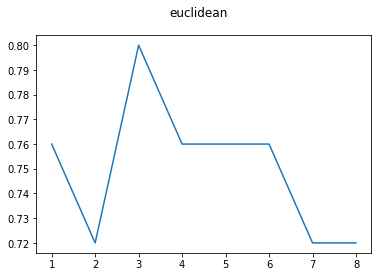

	manhattan
		K:  1 	Accuracy:  0.76
		K:  2 	Accuracy:  0.72
		K:  3 	Accuracy:  0.8
		K:  4 	Accuracy:  0.76
		K:  5 	Accuracy:  0.76
		K:  6 	Accuracy:  0.72
		K:  7 	Accuracy:  0.68
		K:  8 	Accuracy:  0.68


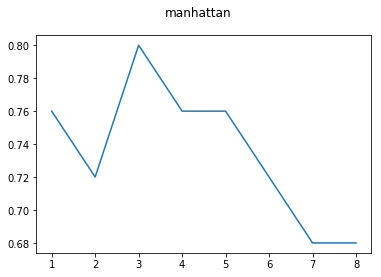

	minkowski
		K:  1 	Accuracy:  0.76
		K:  2 	Accuracy:  0.72
		K:  3 	Accuracy:  0.8
		K:  4 	Accuracy:  0.76
		K:  5 	Accuracy:  0.76
		K:  6 	Accuracy:  0.76
		K:  7 	Accuracy:  0.72
		K:  8 	Accuracy:  0.72


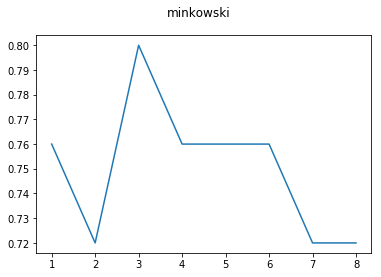

In [4]:
measure = ['euclidean', 'manhattan', 'minkowski']

print 'Robot 1'

for m in measure:
    x = []
    y = []
    print '\t', m
    for k in range(1, 9):
        a = knn(m , k, train_robot1, validation_robot1)
        print '\t\tK: ', k, '\tAccuracy: ', a
        y.append(a)
        x.append(k)
    plt.plot(x, y)
    plt.suptitle(m)
    plt.show()

Robot 2
	euclidean
		K:  1 	Accuracy:  0.75
		K:  2 	Accuracy:  0.916666666667
		K:  3 	Accuracy:  0.875
		K:  4 	Accuracy:  0.875
		K:  5 	Accuracy:  0.833333333333
		K:  6 	Accuracy:  0.958333333333
		K:  7 	Accuracy:  0.916666666667
		K:  8 	Accuracy:  0.916666666667


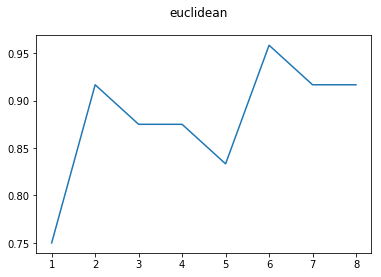

	manhattan
		K:  1 	Accuracy:  0.75
		K:  2 	Accuracy:  0.916666666667
		K:  3 	Accuracy:  0.875
		K:  4 	Accuracy:  0.875
		K:  5 	Accuracy:  0.833333333333
		K:  6 	Accuracy:  0.958333333333
		K:  7 	Accuracy:  0.916666666667
		K:  8 	Accuracy:  0.916666666667


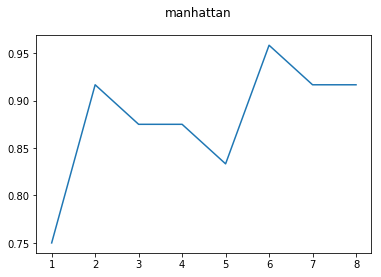

	minkowski
		K:  1 	Accuracy:  0.75
		K:  2 	Accuracy:  0.916666666667
		K:  3 	Accuracy:  0.875
		K:  4 	Accuracy:  0.875
		K:  5 	Accuracy:  0.833333333333
		K:  6 	Accuracy:  0.958333333333
		K:  7 	Accuracy:  0.916666666667
		K:  8 	Accuracy:  0.916666666667


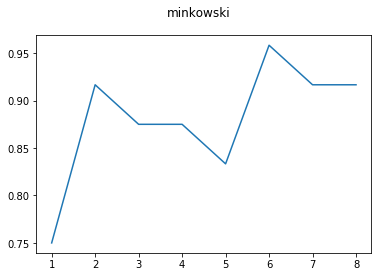

In [5]:
print 'Robot 2'

for m in measure:
    x = []
    y = []
    print '\t', m
    for k in range(1, 9):
        a = knn(m , k, train_robot2, validation_robot2)
        print '\t\tK: ', k, '\tAccuracy: ', a
        y.append(a)
        x.append(k)
    plt.plot(x, y)
    plt.suptitle(m)
    plt.show()